# ARIMA Model for Forecasting

ARIMA (AutoRegressive Integrated Moving Average) is a model that focuses on a set of time structures in data. It is used for both analysis and forecasting in time series data.  The three components are autoregression, integrated, and moving average.  For autoregression, it is simply a model between a target variable's data and its lagged values.  For integrated, it is when you use .diff() to difference the data in order to improve stationarity. You can use second and third order differencings, which go beyond the first difference.  For moving average, just as previously discussed, it focuses on data and residual error from a moving average model applied to lagged observations.   

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

## Example 1: Vacation dataset

In [8]:
vacat= pd.read_csv("df_vacation.csv", index_col=0, parse_dates=True)
vacat.head()

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89


In [9]:
# ARIMA model

from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot 

# ARIMA.fit(start_params=None, trend='c', method='css-mle', transparams=True, solver='lbfgs', maxiter=500, 
#          full_output=1, disp=5, callback=None, start_ar_lags=None, **kwargs)[source]
# Fits ARIMA(p,d,q) model by exact maximum likelihood via Kalman filter.


# p: The number of lag observations included in the model, also called the lag order.
# d: The number of times that the raw observations are differenced, also called the degree of differencing.
# q: The size of the moving average window, also called the order of moving average.

model = ARIMA(vacat,order=(1,1,1)) 
# fit model
model_fit = model.fit()  
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               ARIMA Model Results                               
Dep. Variable:     D.Num_Search_Vacation   No. Observations:                  189
Model:                    ARIMA(1, 1, 1)   Log Likelihood                -683.838
Method:                          css-mle   S.D. of innovations              8.931
Date:                   Fri, 17 Apr 2020   AIC                           1375.675
Time:                           18:22:48   BIC                           1388.642
Sample:                       02-01-2004   HQIC                          1380.928
                            - 10-01-2019                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1893      0.034     -5.504      0.000      -0.257      -0.122
ar.L1.D.Num_Search_Vacation     0.6666      0.055     12

The number of observations is 189.  The standard deviation is 8.931.  The lag variables for both AR(1) and MA(1) are both statistically significant, based off of the p-values, which are 0.00.

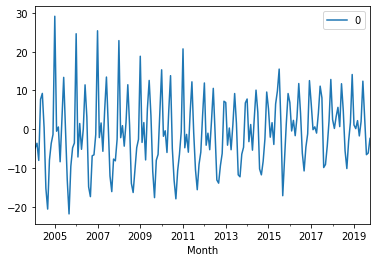

In [10]:
# line plot of residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

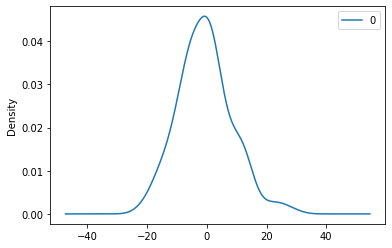

                0
count  189.000000
mean    -0.611513
std      9.039776
min    -21.836469
25%     -6.429927
50%     -0.839614
75%      4.209086
max     29.140171


In [11]:
# kernel density plot of residual errors
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

The mean is close to zero and the standard deviation is 9.039.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


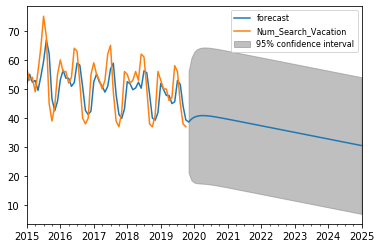

In [12]:
# Forecast with ARIMA model
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

mod = ARIMA(vacat,order=(1,1, 1))
res = mod.fit()

# Plot the original series and the forecasted series
#res.plot_predict()
res.plot_predict(start='2015-01-01',end='2025-01-01')
plt.legend(fontsize=8)
plt.show();

The blue color, which is the predicted values, come very close to the actual values.  We can see the forecast at 2020.

## Example 2:  Bank of America

In [12]:
bac = pd.read_csv('df_bankofamerica.csv', index_col=0, parse_dates=True)
bac=bac.resample(rule='W').last()  # rule is weekly and last day of week
bac.head()

,Adj Close Price
Date,
1990-01-07,1.652200
1990-01-14,1.569591
1990-01-21,1.624664
1990-01-28,1.578769
1990-02-04,1.574180


In [13]:
bac.tail()

,Adj Close Price
Date,
2019-09-22,29.590000
2019-09-29,29.350000
2019-10-06,28.370001
2019-10-13,28.910000
2019-10-20,30.170000


In [14]:
# ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# ARIMA.fit(start_params=None, trend='c', method='css-mle', transparams=True, solver='lbfgs', maxiter=500, 
#          full_output=1, disp=5, callback=None, start_ar_lags=None, **kwargs)[source]
# Fits ARIMA(p,d,q) model by exact maximum likelihood via Kalman filter.


# p: The number of lag observations included in the model, also called the lag order.
#d: The number of times that the raw observations are differenced, also called the degree of differencing.
# q: The size of the moving average window, also called the order of moving average.


model = ARIMA(bac,order=(1,1,1)) 
# fit model
model_fit = model.fit()  
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.Adj Close Price   No. Observations:                 1554
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1921.283
Method:                       css-mle   S.D. of innovations              0.833
Date:                Sun, 01 Dec 2019   AIC                           3850.567
Time:                        19:50:04   BIC                           3871.961
Sample:                    01-14-1990   HQIC                          3858.523
                         - 10-20-2019                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0184      0.021      0.893      0.372      -0.022       0.059
ar.L1.D.Adj Close Price    -0.8721      0.047    -18.477      0.000      -0.965      -0.780


Both AR(1) and MA(1) lagged variables are statistically significant.  The p-values are 0.00.

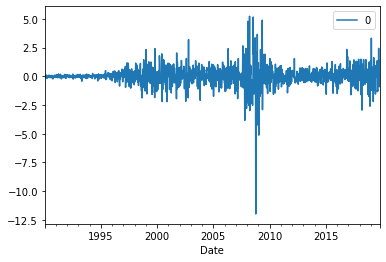

In [15]:
# line plot of residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

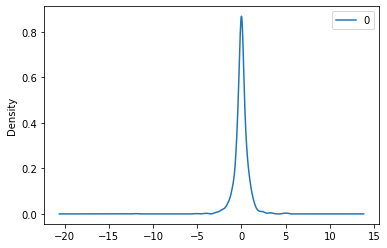

                 0
count  1554.000000
mean     -0.000006
std       0.833368
min     -11.988227
25%      -0.293216
50%       0.007842
75%       0.303397
max       5.232681


In [16]:
# kernel density plot of residual errors
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

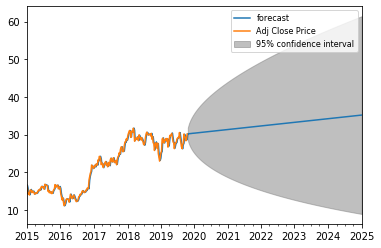

In [17]:
# Forecast with ARIMA model
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

mod = ARIMA(bac,order=(1,1, 1))
res = mod.fit()

# Plot the original series and the forecasted series
#res.plot_predict()
res.plot_predict(start='2015',end='2025')
plt.legend(fontsize=8)
plt.show();

Predicted values are very closely aligned to actual values.  Forecast is shown.